In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [8]:
df=pd.read_excel("cyclingcsvfile.xlsx")

In [3]:
df.head()

,all_riders,rider_class,stage,points,stage_class
0,Tadej PogaÄar,All Rounder,X1,15,flat
1,Tadej PogaÄar,All Rounder,X2,219,hills
2,Tadej PogaÄar,All Rounder,X3,34,flat
3,Tadej PogaÄar,All Rounder,X4,264,hills
4,Tadej PogaÄar,All Rounder,X6,114,hills


In [10]:
print(df.head())


       all_riders  rider_class stage  points stage_class
0  Tadej PogaÄar  All Rounder    X1      15        flat
1  Tadej PogaÄar  All Rounder    X2     219       hills
2  Tadej PogaÄar  All Rounder    X3      34        flat
3  Tadej PogaÄar  All Rounder    X4     264       hills
4  Tadej PogaÄar  All Rounder    X6     114       hills


In [11]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   all_riders   3496 non-null   object
 1   rider_class  3496 non-null   object
 2   stage        3496 non-null   object
 3   points       3496 non-null   int64 
 4   stage_class  3496 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.7+ KB


In [12]:
df.isnull().sum()




all_riders     0
rider_class    0
stage          0
points         0
stage_class    0
dtype: int64

In [13]:
df["rider_class"].value_counts()

rider_class
Unclassed      2185
Sprinter        551
Climber         437
All Rounder     323
Name: count, dtype: int64

In [14]:
df["stage_class"].value_counts()

stage_class
hills    1472
flat     1104
mount     920
Name: count, dtype: int64

In [17]:
total_points = (
    df.groupby(["all_riders", "rider_class"], as_index=False)["points"]
      .sum()
      .rename(columns={"points": "total_points"})
)


In [18]:
total_points

,all_riders,rider_class,total_points
0,Adam Yates,All Rounder,356
1,Alberto Dainese,Sprinter,322
2,Aleksandr Vlasov,All Rounder,166
3,Alex Aranburu,Sprinter,58
4,Alex Baudin,Unclassed,118
...,...,...,...
179,Warren Barguil,Unclassed,24
180,Will Barta,Unclassed,131
181,Wout Van Aert,Unclassed,925
182,Xandro Meurisse,Unclassed,137


In [19]:
mean_points = (
    df.groupby(["all_riders", "rider_class", "stage_class"], as_index=False)["points"]
      .mean()
      .rename(columns={"points": "mean_points"})
)


In [20]:

mean_points


,all_riders,rider_class,stage_class,mean_points
0,Adam Yates,All Rounder,flat,8.666667
1,Adam Yates,All Rounder,hills,12.250000
2,Adam Yates,All Rounder,mount,41.200000
3,Alberto Dainese,Sprinter,flat,46.333333
4,Alberto Dainese,Sprinter,hills,5.500000
...,...,...,...,...
547,Xandro Meurisse,Unclassed,hills,9.000000
548,Xandro Meurisse,Unclassed,mount,7.000000
549,Yevgeniy Fedorov,Unclassed,flat,16.666667
550,Yevgeniy Fedorov,Unclassed,hills,5.000000


In [22]:
desc_total = (
    total_points
    .groupby("rider_class")["total_points"]
    .agg(["count", "mean", "median", "std", "min", "max"])
)

desc_total["IQR"] = (
    total_points.groupby("rider_class")["total_points"].quantile(0.75)
    - total_points.groupby("rider_class")["total_points"].quantile(0.25)
)

desc_total


,count,mean,median,std,min,max,IQR
rider_class,,,,,,,
All Rounder,17,716.058824,592.0,769.852053,2,2789,773.0
Climber,23,383.217391,287.0,334.005029,0,1308,223.0
Sprinter,29,285.689655,268.0,273.104912,0,1203,290.0
Unclassed,115,121.973913,60.0,173.603878,0,1022,122.5


In [34]:
min(desc_total["mean"])

121.97391304347826

In [35]:
max(desc_total["mean"])

716.0588235294117

In [24]:
desc_stage = (
    mean_points
    .groupby(["rider_class", "stage_class"])["mean_points"]
    .agg(["count", "mean", "median", "std"])
)

desc_stage


count       mean     median        std
rider_class stage_class                                        
All Rounder flat            17  15.441176   8.666667  19.651914
            hills           17  35.786765  25.625000  39.703141
            mount           17  67.423529  34.800000  79.262314
Climber     flat            23   5.094203   5.666667   3.948797
            hills           23  21.668478  12.500000  21.381166
            mount           23  35.860870  22.800000  37.602390
Sprinter    flat            29  38.977011  43.666667  36.217370
            hills           29   5.202586   1.000000   9.051158
            mount           29   2.041379   0.000000   5.054101
Unclassed   flat           115   5.740580   2.000000  10.649181
            hills          115   9.096739   2.750000  15.914847
            mount          115   2.951304   0.400000   5.948468

<Figure size 700x500 with 0 Axes>

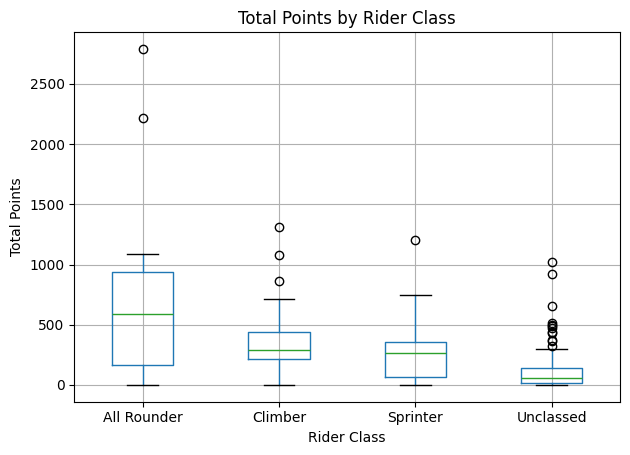

In [25]:
plt.figure(figsize=(7,5))
total_points.boxplot(column="total_points", by="rider_class")
plt.title("Total Points by Rider Class")
plt.suptitle("")
plt.xlabel("Rider Class")
plt.ylabel("Total Points")
plt.tight_layout()
plt.show()


<Figure size 900x500 with 0 Axes>

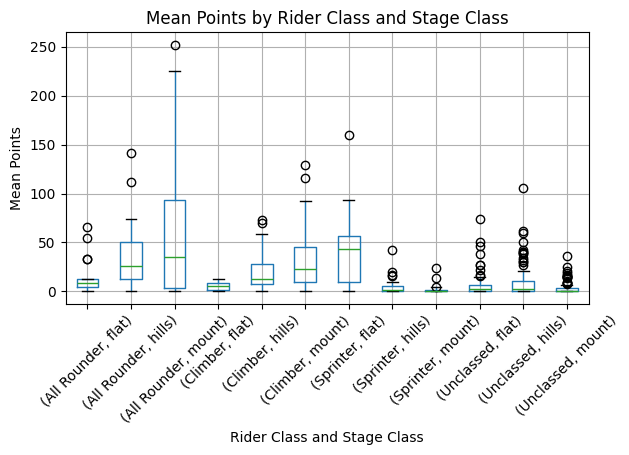

In [26]:
plt.figure(figsize=(9,5))
mean_points.boxplot(
    column="mean_points",
    by=["rider_class", "stage_class"],
    rot=45
)
plt.title("Mean Points by Rider Class and Stage Class")
plt.suptitle("")
plt.xlabel("Rider Class and Stage Class")
plt.ylabel("Mean Points")
plt.tight_layout()
plt.show()


In [28]:
model = smf.ols("total_points ~ C(rider_class)", data=total_points).fit()
anova_oneway = sm.stats.anova_lm(model, typ=2)
anova_oneway


,sum_sq,df,F,PR(>F)
C(rider_class),5.982980e+06,3.0,20.558604,1.679436e-11
Residual,1.746124e+07,180.0,NaN,NaN


In [29]:
shapiro_stat, shapiro_p = stats.shapiro(model.resid)
print("Shapiro-Wilk p-value:", shapiro_p)


Shapiro-Wilk p-value: 2.798948111703523e-16


In [31]:
kw_stat, kw_p = stats.kruskal(*groups)
print("Kruskal-Wallis statistic:", kw_stat)
print("Kruskal-Wallis p-value:", kw_p)


Kruskal-Wallis statistic: 41.995089348590945
Kruskal-Wallis p-value: 4.021765176466984e-09


In [33]:
model2 = smf.ols(
    "mean_points ~ C(rider_class) * C(stage_class)",
    data=mean_points
).fit()

anova_twoway = sm.stats.anova_lm(model2, typ=2)
anova_twoway


,sum_sq,df,F,PR(>F)
C(rider_class),57780.718829,3.0,40.156369,1.945077e-23
C(stage_class),112.236203,2.0,0.117003,8.896054e-01
C(rider_class):C(stage_class),60613.767173,6.0,21.062639,3.007537e-22
Residual,259000.740089,540.0,NaN,NaN


In [36]:
model2 = smf.ols(
    "mean_points ~ C(rider_class) * C(stage_class)",
    data=mean_points
).fit()

table4 = sm.stats.anova_lm(model2, typ=2)
print(table4)


                                      sum_sq     df          F        PR(>F)
C(rider_class)                  57780.718829    3.0  40.156369  1.945077e-23
C(stage_class)                    112.236203    2.0   0.117003  8.896054e-01
C(rider_class):C(stage_class)   60613.767173    6.0  21.062639  3.007537e-22
Residual                       259000.740089  540.0        NaN           NaN


<Figure size 900x500 with 0 Axes>

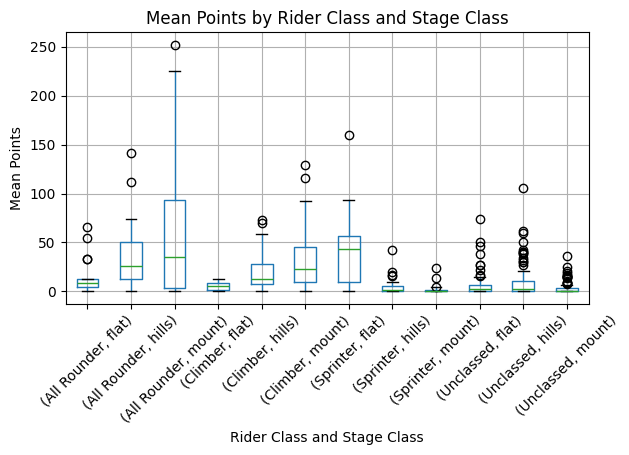

In [37]:
plt.figure(figsize=(9,5))
mean_points.boxplot(
    column="mean_points",
    by=["rider_class", "stage_class"],
    rot=45
)
plt.title("Mean Points by Rider Class and Stage Class")
plt.suptitle("")
plt.xlabel("Rider Class and Stage Class")
plt.ylabel("Mean Points")
plt.tight_layout()
plt.show()
